In [12]:
import ipywidgets as widgets
from ipywidgets import interactive_output, HBox, VBox
from CactusTool import TimeSeries
import matplotlib.pyplot as plt
import CactusTool

# name = 'BBH001'
name = 'BBH003'
# sim = CactusTool.load(name, '/Volumes/simulations/')
sim = CactusTool.load(name, '/Users/liuyu/Desktop/Remote')

chapter = widgets.Label(value='Scalar:')

ftype_item = widgets.Dropdown(description='File type:', value='maximum', options=['maximum', 'minimum',  'norm1', 'norm2', 'average', ''])
dsets = sim.Scalar(ftype='maximum')
fname = list(dsets.fname)
fname_item = widgets.Dropdown(description='File name:', options=fname)
def update_fname_item(*args):
    fname_item.options = sim.Scalar(ftype_item.value).fname
ftype_item.observe(update_fname_item, 'value')
var = dsets[fname[0]].vars
var_item = widgets.Dropdown(description='Variable:', options=var)
def update_var_item(*args):
    var_item.options = sim.Scalar(ftype_item.value)[fname_item.value].vars
fname_item.observe(update_var_item, 'value')

def execute(ftyoe, fname, var):
    p = sim.Scalar(ftyoe)[fname].dsets(var)
    fig, ax = plt.subplots(figsize=(10,4))
    TimeSeries(ax, p)
    ax.set_title(var)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.show()

output = interactive_output(execute, 
                            {
                                'ftyoe': ftype_item,
                                'fname': fname_item,
                                'var': var_item,
                            })
    
VBox([
    chapter,
    HBox([
        ftype_item,
        fname_item,
        var_item,
    ]),
    output,
])

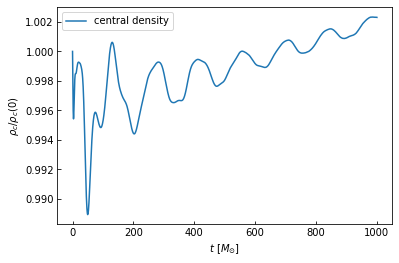

In [23]:
import numpy as np
lin_data = np.genfromtxt("/Users/liuyu/Desktop/Remote/tov_ET/output-0000/static_tov/hydrobase-rho.maximum.asc")
plt.plot(lin_data[:,1],lin_data[:,2]/lin_data[0,2], label="central density")
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c / \rho_c(0)$')
plt.legend()

In [10]:
! ls /Users/liuyu/Desktop/Remote

BBH001     BBH001Lev2 BBH003     GW150914   helloworld tov_ET
BBH001Lev1 BBH001Lev3 CACHE      TRASH      mytests
